In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import sys
%matplotlib inline

# I

In [2]:
f1 = lambda x: x**3 # [0, 1]
f2 = lambda x: abs(x-0.2) # [0, 1]
f3 = lambda x: x*math.sin(1.0/x) # [0.01, 1]

In [3]:
f1(1), f2(1), f3(1)

(1, 0.8, 0.8414709848078965)

In [4]:
def exhaustive_search(f, a, b, eps=0.001):
    X = np.arange(a, b+eps, eps)
    try:
        return {'f_calculations': X.shape[0],\
                'iterations': X.shape[0],\
                'x': X[f(X).argmin()]}
    except TypeError:
        min_val = sys.float_info.max
        res = {'f_calculations': 0,\
                'iterations': 0,\
                'x': X[0]}
        for x in X:
            val = f(x)
            res['f_calculations']+=1
            res['iterations']+=1
            if val < min_val:
                min_val = val
                res['x'] = x
        return res
exhaustive_search(f3, 0.01, 1)

{'f_calculations': 991, 'iterations': 991, 'x': 0.22299999999999984}

In [5]:
def dichotomy(f, a, b, eps=0.001):
    x0 = (a+b)/2
    if(abs(b-a)>2*eps):
        x1 = x0+eps
        x2 = x0-eps
        if(f(x1)>=f(x2)):
            result = dichotomy(f, a, x0, eps)
            return {'f_calculations': result['f_calculations']+2,\
                    'iterations': result['iterations']+1,\
                    'x': result['x']}
        else:
            result = dichotomy(f, x0, b, eps)
            return {'f_calculations': result['f_calculations']+2,\
                    'iterations': result['iterations']+1,\
                    'x': result['x']}
    else:
        return {'f_calculations': 2,\
                'iterations': 1,\
                'x': x0}
dichotomy(f1, 0, 1)

{'f_calculations': 20, 'iterations': 10, 'x': 0.0009765625}

In [6]:
phi = (1+np.sqrt(5))/2
def golden_section(f, a, b, eps=0.001):
    if(abs(b-a)>eps):
        x1 = b-(b-a)/phi
        x2 = a+(b-a)/phi
        if(f(x1)>=f(x2)):
            result = golden_section(f, x1, b, eps)
            return {'f_calculations': result['f_calculations']+2,\
                    'iterations': result['iterations']+1,\
                    'x': result['x']}
        else:
            result = golden_section(f, a, x2, eps)
            return {'f_calculations': result['f_calculations']+2,\
                    'iterations': result['iterations']+1,\
                    'x': result['x']}
    else:
        return {'f_calculations': 2,\
                'iterations': 1,\
                'x': (a+b)/2}
golden_section(f1, 0, 1)

{'f_calculations': 32, 'iterations': 16, 'x': 0.0003665687179287022}

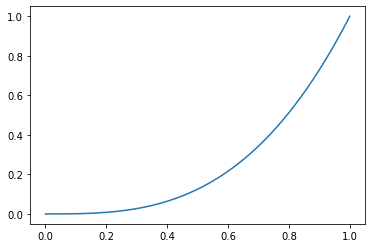

In [7]:
X = np.linspace(0, 1, 50)
# Plotting x^3
plt.plot(X, f1(X))
plt.savefig('x3.png')

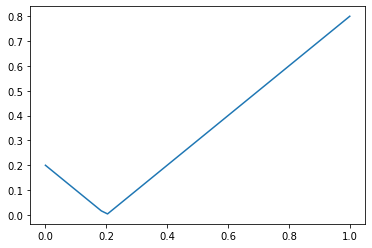

In [8]:
# Plotting |x-0.2|
plt.plot(X, f2(X))
plt.savefig('mod.png')

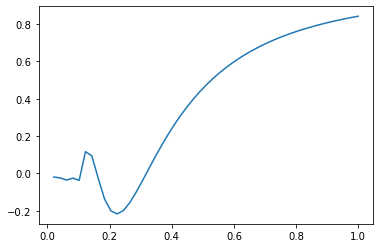

In [9]:
# Plotting x*sin(1.0/x)
plt.plot(X[1:], [f3(x) for x in X[1:]])
plt.savefig('sin.png')

## Experimental calculations

In [10]:
f1_bruteforce = exhaustive_search(f1, 0, 1)
f1_dichotomy = dichotomy(f1, 0, 1)
f1_golden = golden_section(f1, 0, 1)
print(
    "x^3 on [0, 1]:\n" +
    "\tBruteforce:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f1_bruteforce['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f1_bruteforce['f_calculations']) +
    "\t\tIterations: {}\n".format(f1_bruteforce['iterations']) +
    "\tDichotomy:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f1_dichotomy['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f1_dichotomy['f_calculations']) +
    "\t\tIterations: {}\n".format(f1_dichotomy['iterations']) +
    "\tGolden section:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f1_golden['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f1_golden['f_calculations']) +
    "\t\tIterations: {}\n".format(f1_golden['iterations'])
    )

f2_bruteforce = exhaustive_search(f2, 0, 1)
f2_dichotomy = dichotomy(f2, 0, 1)
f2_golden = golden_section(f2, 0, 1)
print(
    "|x-0.2| on [0, 1]:\n" +
    "\tBruteforce:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f2_bruteforce['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f2_bruteforce['f_calculations']) +
    "\t\tIterations: {}\n".format(f2_bruteforce['iterations']) +
    "\tDichotomy:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f2_dichotomy['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f2_dichotomy['f_calculations']) +
    "\t\tIterations: {}\n".format(f2_dichotomy['iterations']) +
    "\tGolden section:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f2_golden['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f2_golden['f_calculations']) +
    "\t\tIterations: {}\n".format(f2_golden['iterations']))

f3_bruteforce = exhaustive_search(f3, 0.01, 1)
f3_dichotomy = dichotomy(f3, 0.01, 1)
f3_golden = golden_section(f3, 0.01, 1)
print(
    "|x-0.2| on [0, 1]:\n" +
    "\tBruteforce:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f3_bruteforce['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f3_bruteforce['f_calculations']) +
    "\t\tIterations: {}\n".format(f3_bruteforce['iterations']) +
    "\tDichotomy:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f3_dichotomy['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f3_dichotomy['f_calculations']) +
    "\t\tIterations: {}\n".format(f3_dichotomy['iterations']) +
    "\tGolden section:\n" +
    "\t\tEstimation of x: {:.2f}\n".format(f3_golden['x']) +
    "\t\tTimes f(x) calculated: {}\n".format(f3_golden['f_calculations']) +
    "\t\tIterations: {}\n".format(f3_golden['iterations']))

x^3 on [0, 1]:
	Bruteforce:
		Estimation of x: 0.00
		Times f(x) calculated: 1001
		Iterations: 1001
	Dichotomy:
		Estimation of x: 0.00
		Times f(x) calculated: 20
		Iterations: 10
	Golden section:
		Estimation of x: 0.00
		Times f(x) calculated: 32
		Iterations: 16

|x-0.2| on [0, 1]:
	Bruteforce:
		Estimation of x: 0.20
		Times f(x) calculated: 1001
		Iterations: 1001
	Dichotomy:
		Estimation of x: 0.20
		Times f(x) calculated: 20
		Iterations: 10
	Golden section:
		Estimation of x: 0.20
		Times f(x) calculated: 32
		Iterations: 16

|x-0.2| on [0, 1]:
	Bruteforce:
		Estimation of x: 0.22
		Times f(x) calculated: 991
		Iterations: 991
	Dichotomy:
		Estimation of x: 0.22
		Times f(x) calculated: 20
		Iterations: 10
	Golden section:
		Estimation of x: 0.22
		Times f(x) calculated: 32
		Iterations: 16



# II

## Random data generation

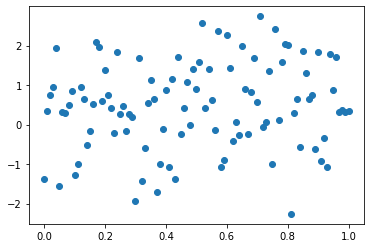

In [11]:
import random
alpha = random.random()
beta = random.random()
X = np.array([k/100.0 for k in range(101)])
deltas = np.random.normal(0, 1, 101)
Y = np.array([alpha*X[k]+beta+deltas[k] for k in range(101)])
plt.scatter(X, Y)
plt.savefig('data_mu1.png')

$\delta_k \sim N(0, 1)$ makes no sence with $\alpha \in (0, 1), \beta \in (0, 1)$, so instead we will use $\delta_k \sim N(0, 0.2)$

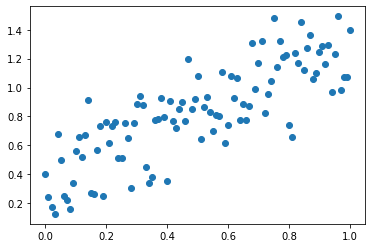

In [12]:
alpha = random.random()
beta = random.random()
X = np.array([k/100.0 for k in range(101)])
deltas = np.random.normal(0, 0.2, 101)
Y = np.array([alpha*X[k]+beta+deltas[k] for k in range(X.shape[0])])
plt.scatter(X, Y)
plt.savefig('data01.png')

In [30]:
alpha, beta

(0.9633719859722296, 0.35988107263279845)

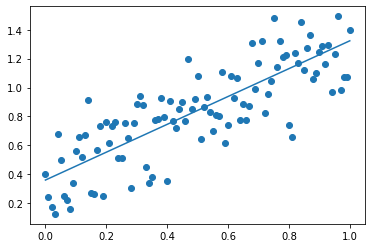

In [13]:
def plot_aproximant(f, data_X=X, data_Y=Y):
    plt.scatter(data_X, data_Y)
    plt.plot(data_X, [f(x) for x in X])
# Here, we plot the data and the alpha*x+beta linear
plot_aproximant(lambda x: alpha*x+beta, X, Y)

In [14]:
def least_squares(F, a, b):
    return sum([(F(X[k], a, b)-Y[k])**2 for k in range(X.shape[0])])

least_squares(lambda x, a, b: a*x+b, alpha, beta)

3.8677919307710904

In [15]:
def linear_approximant(x, a=0.0, b=0.0):
    return a*x+b

def rational_approximant(x, a=0.0, b=0.0):
    return a/(1+b*x)

In [16]:
def exhaustive_search_2d(F, a_min=0.0, a_max=1.0, b_min=0.0, b_max=1.0, eps=0.001):
    a_best = 0
    b_best = 0
    f_calls = 0
    iterations = 0
    best_loss = sys.float_info.max
    a = a_min
    while a <= a_max:
        b = b_min
        while b <= b_max:
            loss = least_squares(F, a, b)
            f_calls += 1
            iterations += 1
            if loss < best_loss:
                best_loss = loss
                a_best = a
                b_best = b
            b+=eps
        a+=eps
    return {'loss': best_loss, 'a': a_best, 'b': b_best, 'f_calls': f_calls, 'iterations': iterations}

print(alpha, beta)
estimation_bruteforce_lin = exhaustive_search_2d(linear_approximant)

0.9633719859722296 0.35988107263279845


In [17]:
estimation_bruteforce_lin

{'loss': 3.848967326202844,
 'a': 0.9260000000000007,
 'b': 0.3700000000000003,
 'f_calls': 1000000,
 'iterations': 1000000}

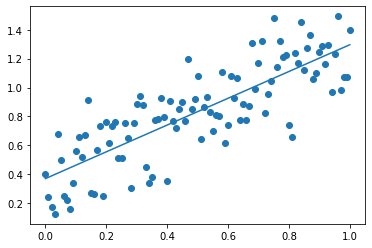

In [18]:
plot_aproximant(lambda x: linear_approximant(x, estimation_bruteforce_lin['a'], estimation_bruteforce_lin['b']))
plt.savefig('bruteforce_lin.png')

In [19]:
print(alpha, beta)
estimation_bruteforce_rational = exhaustive_search_2d(rational_approximant, b_max=-0.1, b_min=-1)
print(estimation_bruteforce_rational)

0.9633719859722296 0.35988107263279845


C:\Users\vokz\AppData\Local\Temp/ipykernel_10440/959982535.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return a/(1+b*x)
C:\Users\vokz\AppData\Local\Temp/ipykernel_10440/959982535.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)


{'loss': 4.623117339152497, 'a': 0.5410000000000004, 'b': -0.6129999999999997, 'f_calls': 900000, 'iterations': 900000}


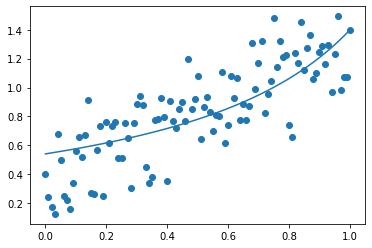

In [20]:
plot_aproximant(lambda x: rational_approximant(x, estimation_bruteforce_rational['a'], estimation_bruteforce_rational['b']))
plt.savefig('bruteforce_rat.png')

   direc: array([[ 0.        ,  1.        ],
       [-0.41221846,  0.20610923]])
     fun: 3.8489612967601077
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 3
  status: 0
 success: True
       x: array([0.92628092, 0.37008973])


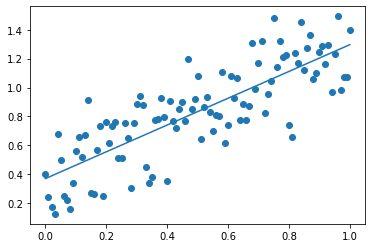

In [21]:
import scipy.optimize as opt

def gauss(F, a0=0.0, b0=0.0, eps = 0.001):
    res = opt.minimize(lambda x: least_squares(F, x[0], x[1]), x0=(a0, b0), method='Powell')
    return res
                   
estimation_gauss_lin = gauss(linear_approximant)
                       
print(estimation_gauss_lin)
plot_aproximant(lambda x: linear_approximant(x, estimation_gauss_lin.x[0], estimation_gauss_lin.x[1]))
plt.savefig('gauss_lin.png')

   direc: array([[-1.61570879e-01, -2.21975422e-01],
       [-1.97335002e-03,  8.38513598e-05]])
     fun: 4.623069972779397
 message: 'Optimization terminated successfully.'
    nfev: 143
     nit: 5
  status: 0
 success: True
       x: array([ 0.54148108, -0.61210319])


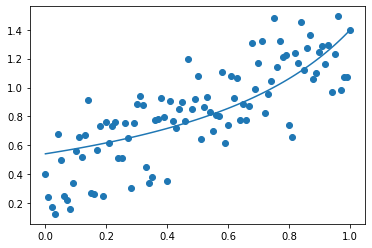

In [22]:
estimation_gauss_rational = gauss(rational_approximant)

print(estimation_gauss_rational)
plot_aproximant(lambda x: rational_approximant(x, estimation_gauss_rational.x[0], estimation_gauss_rational.x[1]))
plt.savefig('gauss_rat.png')

 final_simplex: (array([[0.92630251, 0.37008915],
       [0.92622496, 0.37012303],
       [0.9262449 , 0.37008913]]), array([3.84896131, 3.84896133, 3.84896134]))
           fun: 3.8489613112781806
       message: 'Optimization terminated successfully.'
          nfev: 123
           nit: 65
        status: 0
       success: True
             x: array([0.92630251, 0.37008915])


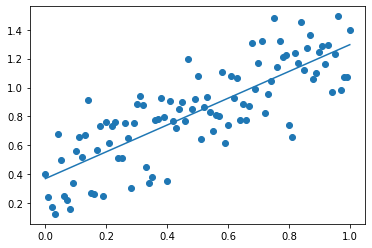

In [23]:
def nelder_mead(F, a0=0.0, b0=0.0, eps = 0.001):
    res = opt.minimize(lambda x: least_squares(F, x[0], x[1]), x0=(a0, b0), method='Nelder-Mead')
    return res
                   
estimation_nelder_mead_lin = nelder_mead(linear_approximant)
                
print(estimation_nelder_mead_lin)
plot_aproximant(lambda x: linear_approximant(x, estimation_nelder_mead_lin.x[0], estimation_nelder_mead_lin.x[1]))
plt.savefig('nedler_lin.png')

 final_simplex: (array([[ 0.54148128, -0.61208348],
       [ 0.54143525, -0.61213711],
       [ 0.54146963, -0.61218193]]), array([4.62307004, 4.62307016, 4.6230708 ]))
           fun: 4.623070041998844
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 51
        status: 0
       success: True
             x: array([ 0.54148128, -0.61208348])


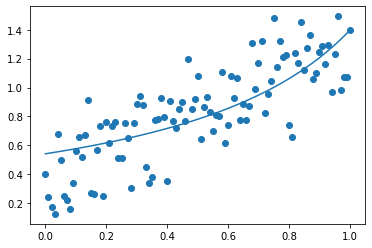

In [24]:
estimation_nelder_mead_rational = nelder_mead(rational_approximant)
                
print(estimation_nelder_mead_rational)
plot_aproximant(lambda x: rational_approximant(x, estimation_nelder_mead_rational.x[0], estimation_nelder_mead_rational.x[1]))
plt.savefig('nedler_rat.png')

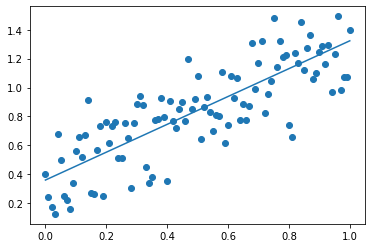

In [25]:
# The graphs obtained by different methods for each type of approximant should be in the same plot so that we can compare

def plot_aproximant(f, data_X=X, data_Y=Y):
    plt.scatter(data_X, data_Y)
    plt.plot(data_X, [f(x) for x in X])
# Here, we plot the data and the alpha*x+beta linear
plot_aproximant(lambda x: alpha*x+beta, X, Y)

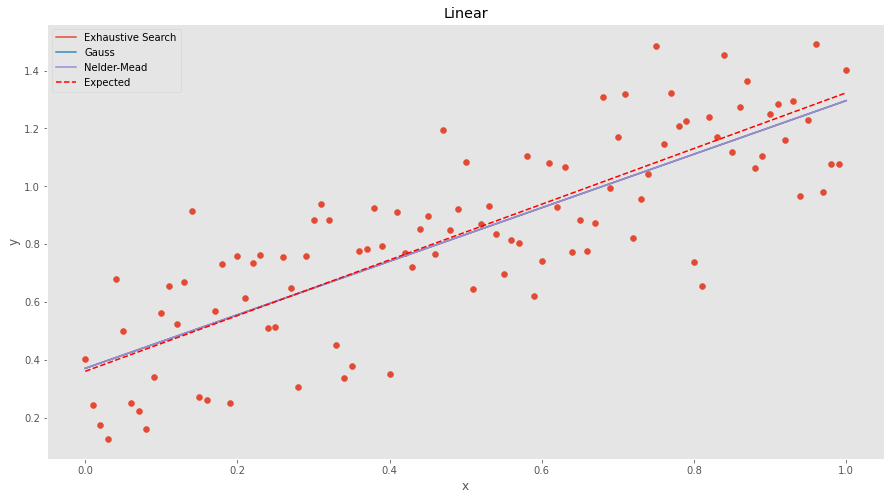

In [29]:
%matplotlib inline

plt.style.use(['ggplot'])

figure = plt.figure(figsize=(15,8))
plt.scatter(X,Y)
plt.plot(X, linear_approximant(X, estimation_bruteforce_lin['a'], estimation_bruteforce_lin['b']), label='Exhaustive Search')
plt.plot(X, linear_approximant(X, estimation_gauss_lin.x[0], estimation_gauss_lin.x[1]), label='Gauss')
plt.plot(X, linear_approximant(X, estimation_nelder_mead_lin.x[0], estimation_nelder_mead_lin.x[1]), label='Nelder-Mead')

real_lin = lambda x: alpha*x+beta
plt.plot(X, [real_lin(x) for x in X], 'r--', label='Expected')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear")
plt.legend()

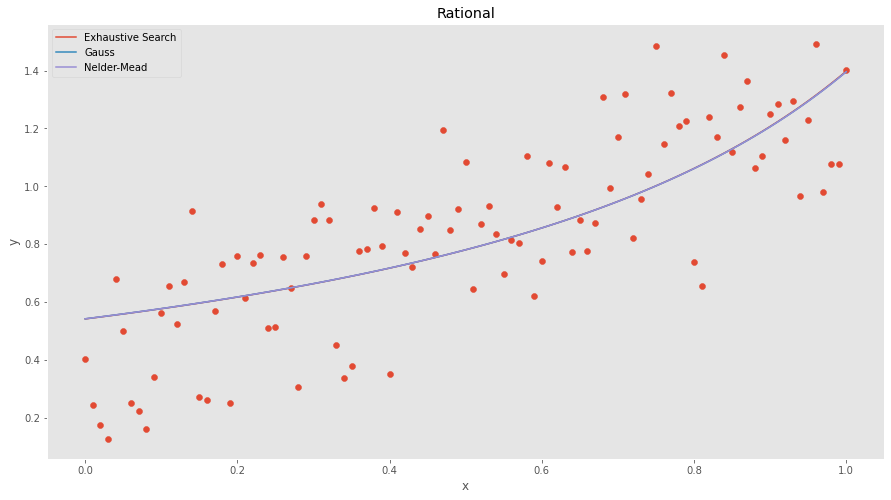

In [27]:
figure = plt.figure(figsize=(15,8))
plt.scatter(X,Y)
plt.plot(X, rational_approximant(X, estimation_bruteforce_rational['a'], estimation_bruteforce_rational['b']), label='Exhaustive Search')
plt.plot(X, rational_approximant(X, estimation_gauss_rational.x[0], estimation_gauss_rational.x[1]), label='Gauss')
plt.plot(X, rational_approximant(X, estimation_nelder_mead_rational.x[0], estimation_nelder_mead_rational.x[1]), label='Nelder-Mead')
# plt.plot(X, linear_approximant(X, results['LMA']['linear']['x'][0], results['LMA']['linear']['x'][1]), label='LMA')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rational")
plt.legend()